In [4]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import utils
import math


deskew() Found angle: 0.0
Found: 476 contours
After filter found: 3 contours


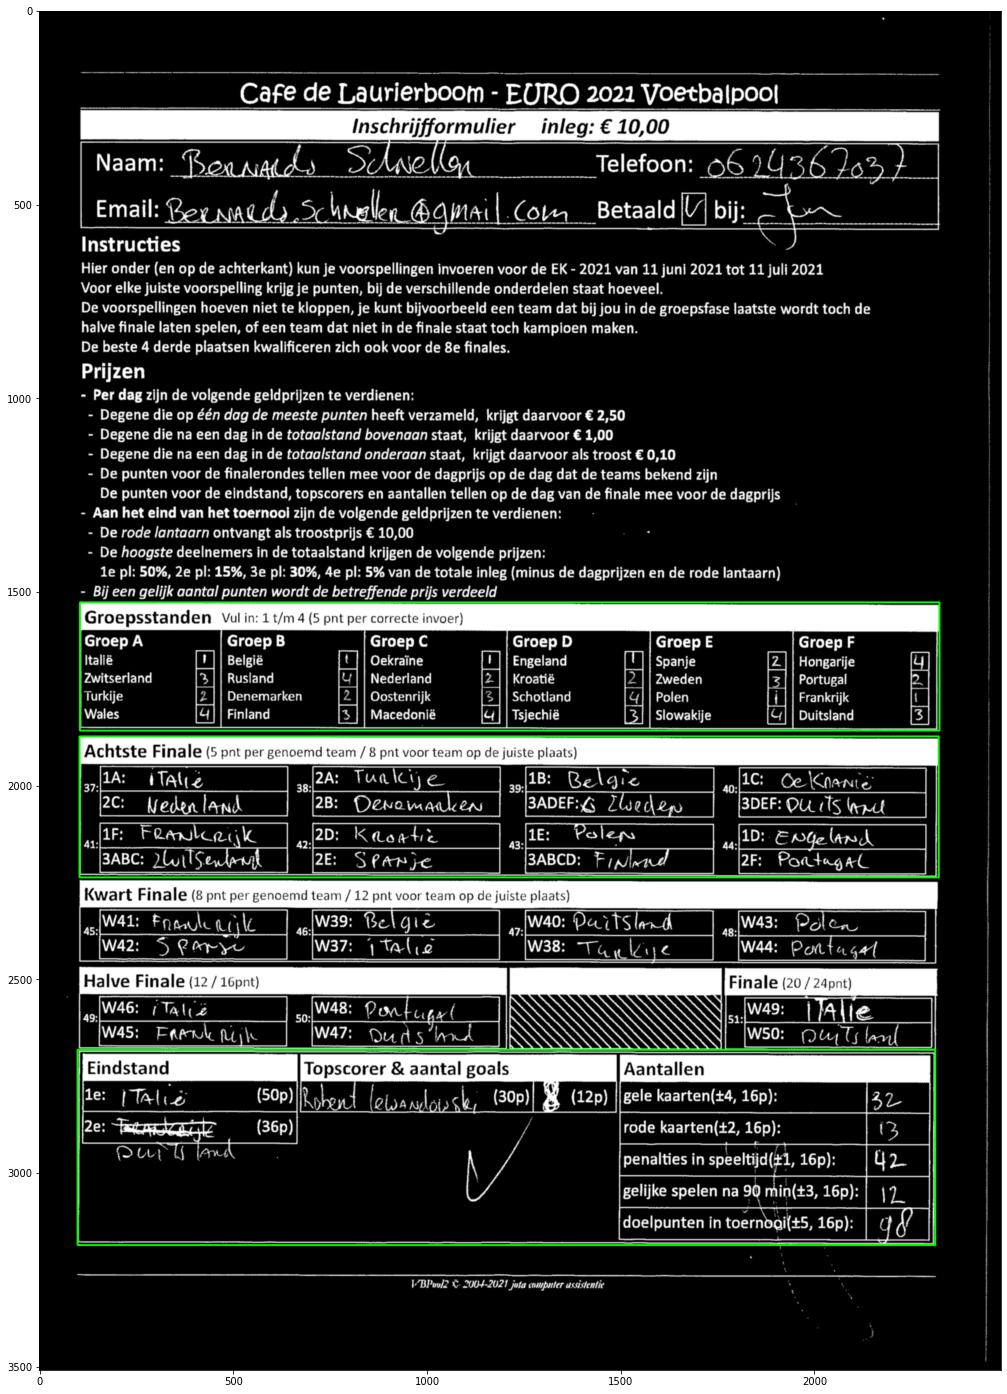

In [59]:
image = cv2.imread('/home/dan/Downloads/poulespng/poule-19.pdf.png', cv2.IMREAD_UNCHANGED)
image = utils.deskew(image, debug=True)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
th, thresh = cv2.threshold(image_gray, 250, 255, cv2.THRESH_BINARY)
thresh = 255 - thresh

blur=cv2.GaussianBlur(thresh, (5, 5), 0)

contours, hierarchy = cv2.findContours(
    image=blur, 
    mode=cv2.RETR_EXTERNAL,
    method=cv2.CHAIN_APPROX_TC89_L1
)
print(f"Found: {len(contours)} contours")

blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

filtered = []
rects = []
for c in contours:
    perimeter = cv2.arcLength(c, True)
    approximation = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    area = cv2.contourArea(c)
    if area < 500000: continue
    if len(approximation) > 4: continue
    filtered.append(c)
    x, y, w, h = cv2.boundingRect(approximation)
    rects.append([x, y, x + w, y + h])
    
print(f"After filter found: {len(filtered)} contours")

for r in rects:
    cv2.rectangle(blur, (r[0], r[1]), (r[2], r[3]), (0, 255, 0), 3)

rects = np.asarray(rects)

plt.figure(figsize=(25, 25))
plt.imshow(blur)
plt.show()